<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>
(209, 64, 64, 3)


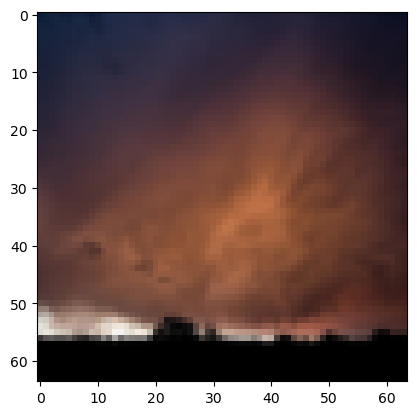

In [24]:
# Unpack and setup images for training
import h5py
import matplotlib.pyplot as plt
import cv2
import numpy as np

outdir = "./train/"
with h5py.File('train_catvnoncat.h5', 'r') as hf:
    print(hf.keys())
    cat_images = hf['train_set_x']
    true_cats = hf['train_set_y']
    print(cat_images.shape)
    for cat in range(cat_images.shape[0]):
        image = cat_images[cat]
        plt.imshow(image)
        cv2.imwrite(f"{outdir}/cat_{cat}.png", image)

    

In [73]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from PIL import Image
from random import shuffle, choice
import numpy as np
import os

IMAGE_SIZE = 256
IMAGE_DIRECTORY = './train'

# Generate a label for the image based on the directory it is in
def label_img(name):
  if name == 'cat': return np.array([1, 0])
  elif name == 'notcat' : return np.array([0, 1])

# Load in and preprocess the images from the directories, return an array of them with labels
def load_data():
  print("Loading images...")
  train_data = []
  directories = next(os.walk(IMAGE_DIRECTORY))[1]

  for dirname in directories:
    print("Loading {0}".format(dirname))
    file_names = next(os.walk(os.path.join(IMAGE_DIRECTORY, dirname)))[2]
    for i in range(len(file_names)):
      image_name = choice(file_names)
      image_path = os.path.join(IMAGE_DIRECTORY, dirname, image_name)
      label = label_img(dirname)
      if "DS_Store" not in image_path:
        img = Image.open(image_path)
        img = img.convert('L')
        img = img.resize((IMAGE_SIZE, IMAGE_SIZE))
        train_data.append([np.array(img), label])

  return train_data

# Create the model for binary classification of whether a cat is present
def create_model():
  model = Sequential()
  model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', 
                   input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(BatchNormalization())
  model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(BatchNormalization())
  model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(BatchNormalization())
  model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(BatchNormalization())
  model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(2, activation = 'softmax'))

  return model

# load data and convert into shape/format expected by Keras
training_data = load_data()
training_images = np.array([i[0] for i in training_data]).reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1)
training_labels = np.array([i[1] for i in training_data])

# Create and train model based on the provided cat/nocat images
print('creating model')
model = create_model()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print('training model')
model.fit(training_images, training_labels, batch_size=7, epochs=10, verbose=1)
model.save("cat_model.keras")

Loading images...
Loading cat
Loading notcat
creating model
training model
Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - accuracy: 0.6634 - loss: 0.7684
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.8700 - loss: 0.3795
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.9499 - loss: 0.1609
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step - accuracy: 0.9954 - loss: 0.0660
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 160ms/step - accuracy: 0.9742 - loss: 0.0791
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 147ms/step - accuracy: 1.0000 - loss: 0.0314
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step - accuracy: 0.9925 - loss: 0.0276
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 147ms/step - accuracy: 0.9916 - loss: 0.0312
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 144ms/step - accuracy: 0.9860 - loss: 0.0287
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 154ms/step - accuracy: 0.9997 - loss: 0.0051


Loading images...
Loading cat
Loading notcat
Loading model...
Testing model...
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.7642 - loss: 0.7395
accuracy: 74.00000095367432
loss: 89.47628140449524
Misses at indices: [ 4.  5.  8. 15. 17. 30. 35. 36. 38. 39. 44. 48. 49.]
Ratio of misses to total: 13/50


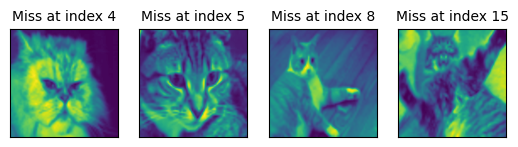

In [75]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from PIL import Image
from random import shuffle, choice
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Set constants
IMAGE_SIZE = 256
IMAGE_DIRECTORY = './test'

# Method for labeling image based on classification/ground truth
# Hardcoded to correspond to data categories
def label_img(name):
    if name == 'cat': return np.array([1, 0])
    elif name == 'notcat' : return np.array([0, 1])

# Load in images and label
def load_data(imdir):
  print("Loading images...")
  test_data = []
  directories = next(os.walk(imdir))[1]

  # process and label every image in every directory
  for dirname in directories:
    print("Loading {0}".format(dirname))
    file_names = next(os.walk(os.path.join(imdir, dirname)))[2]
    file_names = sorted(file_names)
    for i in range(len(file_names)):
      image_name = file_names[i]
      image_path = os.path.join(imdir, dirname, image_name)
      if image_name != ".DS_Store":
        label = label_img(dirname)
        img = Image.open(image_path)
        img = img.convert('L')
        img = img.resize((IMAGE_SIZE, IMAGE_SIZE))
        test_data.append([np.array(img), label])
  
  return test_data

# Load and preprocess images
test_data = load_data(IMAGE_DIRECTORY)
test_images = np.array([i[0] for i in test_data]).reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1)
test_labels = np.array([i[1] for i in test_data])


# Load in model generated in previous step
print('Loading model...')
model = load_model("cat_model.keras")

# Assess model accuracy using Keras methods
print('Testing model...')
loss, acc = model.evaluate(test_images, test_labels, verbose=1)

print("accuracy: {0}".format(acc * 100))
print("loss: {0}".format(loss * 100))

# Create subplots to look at misses and arrays for data collection
fig, axs = plt.subplots(1,4)
axs[0].imshow(test_images[0])

results = np.zeros(test_images.shape[0])
misses = 0

# Make a prediction for every image in the test set and plot the first four for analysis
for i in range(test_images.shape[0]):
    prediction = model.predict(test_images[i:i+1], verbose=0)[0][0] # probability that it IS a cat
    results[i] = prediction > 0.5  # convert to boolean
    if misses < 4 and results[i] != test_labels[i][0]: # plot if a miss and not 4 plots yet
        axs[misses].imshow(test_images[i])
        axs[misses].xaxis.set_major_locator(ticker.NullLocator())
        axs[misses].yaxis.set_major_locator(ticker.NullLocator())
        axs[misses].title.set_text(f"Miss at index {i}")
        axs[misses].title.set_size(10)
        misses += 1

#print(test_labels)
#print(results)


# Go through results of prediction and report indices of all misses
miss_array = np.zeros(1)

for i in range(len(results)):
    if results[i] != test_labels[:,0][i]:
        miss_array = np.concatenate([miss_array, [i]])

miss_array = miss_array[1:len(miss_array)+1]
print(f"Misses at indices: {miss_array}")
print(f"Ratio of misses to total: {len(miss_array)}/{len(test_images)}")
    

globals().clear() # issues with tensors not being reset in Jupyter